In [1]:
from dotenv import load_dotenv
import os
from langchain.chat_models import init_chat_model

load_dotenv()

model_name = os.getenv("MODEL_NAME")           # e.g. gemini-1.5-flash
model_provider = os.getenv("MODEL_PROVIDER")   # google_genai

llm = init_chat_model(model=model_name)

print("✅ Gemini model initialized successfully!")


c:\practice\LLM\emailtoner\.venv\Lib\site-packages\google\cloud\aiplatform\models.py:52: FutureWarning: Support for google-cloud-storage < 3.0.0 will be removed in a future version of google-cloud-aiplatform. Please upgrade to google-cloud-storage >= 3.0.0.
  from google.cloud.aiplatform.utils import gcs_utils


✅ Gemini model initialized successfully!


In [2]:
llm.invoke("What is capital of Nepal?")

AIMessage(content='The capital of Nepal is **Kathmandu**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 9, 'total_token_count': 83, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 68, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -1.2943787044949002, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--278b8f7f-e6ac-436d-950b-2616de4dd7e6-0', usage_metadata={'input_tokens': 6, 'output_tokens': 9, 'total_tokens': 83, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 68}})

In [4]:
 
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage("You are expert in math"),
    HumanMessage("How to find a lowest point in calculus ?")
]

In [5]:
response = llm.invoke(messages)

In [6]:
print(response.content)

Finding the lowest point (often called a **minimum value** or **local minimum**, or even **absolute minimum**) of a function using calculus is a fundamental optimization problem. Here's a breakdown of the steps and the underlying principles:

---

### The Core Idea: What Calculus Tells Us

At a local minimum of a smooth function, the tangent line to the curve is horizontal. This means the slope of the tangent line is zero. In calculus, the slope of the tangent line is given by the **first derivative** of the function.

So, the first step is always to find where the first derivative is zero (or undefined). These points are called **critical points**.

---

### Steps to Find a Lowest Point:

Let's say you have a function $f(x)$ and you want to find its minimum value.

**Step 1: Find the First Derivative ($f'(x)$).**
This derivative tells you the slope of the function at any point $x$.

**Step 2: Find the Critical Points.**
Set the first derivative equal to zero and solve for $x$:
$f'(x) 

In [1]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END

In [2]:
class MathState(TypedDict):
    a: int
    b: int
    op: Literal["add", "sub"] 
    result: int

In [3]:
def add(state: MathState) -> MathState:
    state['result'] = state['a'] + state['b']
    return state

In [4]:
def sub(state: MathState) -> MathState:
    state['result'] = state['a'] - state['b']
    return state

In [6]:
def route(state: MathState) -> Literal["add_node", "sub_node"]:
    if state["op"] == "add":
        return "add_node"
    else:
        return "sub_node"

In [7]:
math_graph = StateGraph(MathState)
math_graph.add_node("add_node", add)
math_graph.add_node("sub_node", sub)
math_graph.add_conditional_edges(START, route)
math_graph.add_edge("add_node", END)
math_graph.add_edge("sub_node", END)

In [8]:
graph = math_graph.compile()

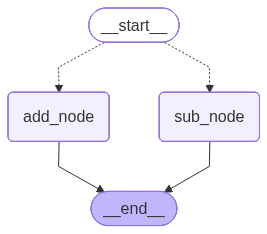

In [9]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
state = MathState(a=10, b=5, op='add')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'op': 'add', 'result': 15}


In [11]:
state = MathState(a=10, b=5, op='sub')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'op': 'sub', 'result': 5}
